In [1]:
%matplotlib inline
import pandas as pd

In [21]:
self_posts = pd.DataFrame.from_csv('self_post.csv', index_col=None)
self_posts.head(8)

,parent_id,ans_count,acc_id,reply_time,rep_reputation,rep_id
0,1,7,56,2011-11-15T20:53:36.853,708,4
1,1,7,56,2011-11-15T20:54:09.083,3,5
2,2,6,10,2011-11-15T20:54:49.410,111,6
3,2,6,10,2011-11-15T20:57:41.503,445,8
4,3,11,109,2011-11-15T20:58:01.207,404,9
5,2,6,10,2011-11-15T20:58:23.697,2173,10
6,3,11,109,2011-11-15T20:59:05.460,708,11
7,3,11,109,2011-11-15T20:59:33.323,445,12


In [3]:
posts = pd.DataFrame.from_csv('post_rep.csv', index_col=None)
posts.head(8)

,id,type,ans_count,cr_time,score,poster_rep
0,1,1,7,2011-11-15T20:45:51.037,12,1317
1,2,1,6,2011-11-15T20:50:11.270,12,708
2,3,1,11,2011-11-15T20:52:27.287,26,380
3,4,2,NaN,2011-11-15T20:53:36.853,2,708
4,5,2,NaN,2011-11-15T20:54:09.083,0,3
5,6,2,NaN,2011-11-15T20:54:49.410,1,111
6,7,1,7,2011-11-15T20:56:40.383,23,460
7,8,2,NaN,2011-11-15T20:57:41.503,1,445


# Looking for Data Heterogeneity

In [4]:
posts.ans_count.value_counts()

1     821
2     804
3     518
4     256
5     126
6      74
7      27
0      19
8      14
9      10
11      5
10      4
13      3
12      2
14      1
Name: ans_count, dtype: int64

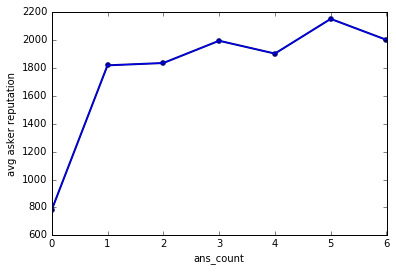

In [12]:
by_ans = posts[posts.ans_count.notnull()]
by_ans = by_ans[by_ans.ans_count <=6].groupby(['ans_count']).mean().poster_rep

ax = by_ans.plot(lw=2,colormap='jet',marker='.',markersize=10)
ax.set(xlabel="answer count", ylabel="avg asker reputation")
by_ans.plot()

# Response time vs Rank

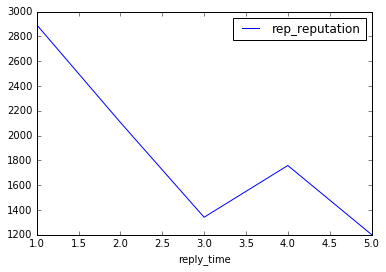

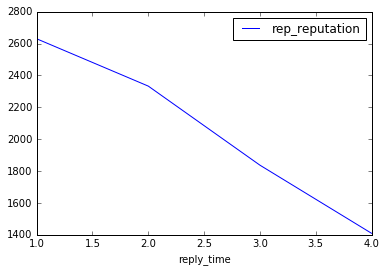

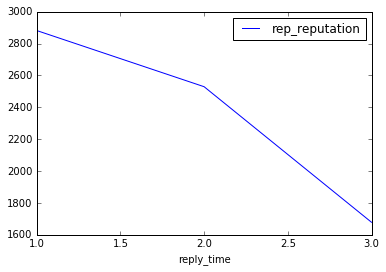

In [22]:
by_r = self_posts[self_posts.ans_count == 5]
by_r = by_r.groupby('parent_id').apply(lambda x: pd.concat([x.sort_values(by='reply_time').head(5).rep_reputation, x.sort_values(by='reply_time').head(5).reply_time.rank()], axis=1))
by_r = by_r.reset_index(drop=True)
by_r.groupby('reply_time').mean().plot()

by_r = self_posts[self_posts.ans_count == 4]
by_r = by_r.groupby('parent_id').apply(lambda x: pd.concat([x.sort_values(by='reply_time').head(5).rep_reputation, x.sort_values(by='reply_time').head(5).reply_time.rank()], axis=1))
by_r = by_r.reset_index(drop=True)
by_r.groupby('reply_time').mean().plot()

by_r = self_posts[self_posts.ans_count == 3]
by_r = by_r.groupby('parent_id').apply(lambda x: pd.concat([x.sort_values(by='reply_time').head(5).rep_reputation, x.sort_values(by='reply_time').head(5).reply_time.rank()], axis=1))
by_r = by_r.reset_index(drop=True)
by_r.groupby('reply_time').mean().plot()

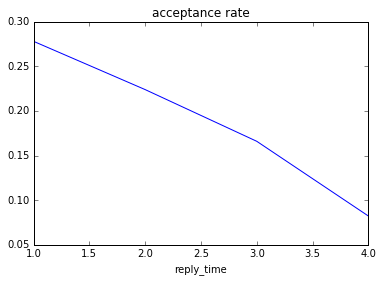

In [30]:
by_ac = self_posts[self_posts.ans_count == 4]
by_ac = by_ac.groupby('parent_id').apply(lambda x: x.sort_values(by='reply_time').head(5)[['acc_id','rep_id']].join(x.sort_values(by='reply_time').head(5).reply_time.rank()))
by_ac = by_ac.reset_index(drop=True)
by_ac.groupby('reply_time').apply(lambda x: (x.acc_id==x.rep_id).mean()).plot(title='acceptance rate')
